# Paper: Data-based analysis, modelling and forecasting of the COVID-19 outbreak

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

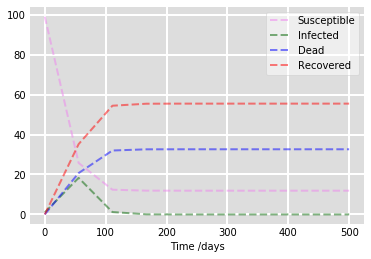

In [8]:
# Initial conditions
#N = 59e6
N = 100

S0 = N - 1
I0 = 1
D0 = 0
R0 = 0
# A grid of time points (in days)
t = np.linspace(0, 500, 100) 

#parameters
alpha = 0.191
beta = 0.05
gamma = 2.94/100

# The SIR model differential equations.
def deriv(y, t, alpha, betta, gamma):
    S, I, D, R = y
    dSdt = - (alpha / N) * S * I
    dIdt = (alpha / N) * S * I - beta * I - gamma * I 
    dDdt = gamma * I
    dRdt = beta * I

    return dSdt, dIdt, dDdt, dRdt


# Initial conditions vector
y0 = S0, I0, D0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(alpha, beta, gamma))
S, I, D, R = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D, 'blue', alpha=0.5, lw=2, label='Dead', linestyle='dashed')
ax.plot(t, R, 'red', alpha=0.5, lw=2, label='Recovered', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, S, I, D, R]) 

#np.savetxt("sidr.csv", a, delimiter=",")

In [4]:
S

array([99.        , 97.73476247, 95.60038759, 92.11845182, 86.73466959,
       79.05423645, 69.24104367, 58.26813085, 47.58890036, 38.39333445,
       31.16442048, 25.79594807, 21.92352113, 19.1595071 , 17.18651711,
       15.77086779, 14.74797424, 14.00359571, 13.45841167, 13.05694205,
       12.75998902, 12.5395665 , 12.37549813, 12.25311446, 12.16167449,
       12.09326856, 12.04204544, 12.00366126, 11.97488223, 11.95329588,
       11.93709952, 11.92494445, 11.91582068, 11.90897135, 11.90382895,
       11.89996781, 11.89706852, 11.8948914 , 11.8932565 , 11.89202875,
       11.89110675, 11.89041434, 11.88989434, 11.88950383, 11.88921055,
       11.8889903 , 11.88882489, 11.88870066, 11.88860737, 11.8885373 ,
       11.88848468, 11.88844516, 11.88841548, 11.88839319, 11.88837645,
       11.88836388, 11.88835444, 11.88834735, 11.88834203, 11.88833803,
       11.88833502, 11.88833277, 11.88833107, 11.8883298 , 11.88832884,
       11.88832813, 11.88832759, 11.88832718, 11.88832688, 11.88

In [5]:
'''
i had 100 points, the difference was 50
for 50 points, difference was 25
for 25 points, difference is be 12.5
'''

'\ni had 100 points, the difference was 50\nfor 50 points, difference was 25\nfor 25 points, difference is be 12.5\n'